EU Cities Temperatures Dataset

Preprocessing/Analysis

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame

In [2]:
#Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.
EU_city = pd.read_csv("EuCitiesTemperatures.csv")
avg_latitude = EU_city['latitude'].groupby(EU_city['country']).mean().round(2)
avg_longitude = EU_city['longitude'].groupby(EU_city['country']).mean().round(2)
for row in EU_city.iterrows():
    ser = row[1]
    for i, col in enumerate(ser.index):
        if col == 'latitude' and pd.isnull(ser.values[i]):
            EU_city.loc[row[0], 'latitude'] = avg_latitude[ser.get('country')]
        if col == 'longitude' and pd.isnull(ser.values[i]):
            EU_city.loc[row[0], 'longitude'] = avg_longitude[ser.get('country')]

In [3]:
EU_city

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


In [4]:
#Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). 
subset = EU_city.query('40 <= latitude <= 60').query('15 <= longitude <= 30')
print(subset['city'].to_frame())
#Find out which countries have the maximum number of cities in this geographical band. 
count_city = subset.groupby('country').count()['city']
max_city = count_city[count_city == count_city.max()].to_frame()
max_city

           city
0       Elbasan
6        Vienna
7         Minsk
8         Orsha
9         Pinsk
..          ...
165       Bursa
169      Edirne
183    Tekirdag
186  Chernivtsi
193       Rivne

[63 rows x 1 columns]


,city
country,
Poland,9
Romania,9


In [5]:
#Fill in the missing temperature values by the average temperature value of the similar region type. 
#A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).
avg_temperature = EU_city.groupby(['EU', 'coastline'])['temperature'].mean().round(2)
for row in EU_city.iterrows():
    ser = row[1]
    for i, col in enumerate(ser.index):
        if col == 'temperature' and pd.isnull(ser.values[i]):
            EU_city.loc[row[0], 'temperature'] = avg_temperature.get(ser.get('EU')).get(ser.get('coastline'))
EU_city

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.31
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


Visualization

In [6]:
from matplotlib import pyplot as plt

In [7]:
#Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.
region = EU_city.groupby(['EU', 'coastline']).count()['city'].to_frame('count')
region

count
EU  coastline       
no  no            16
    yes           47
yes no            14
    yes          136

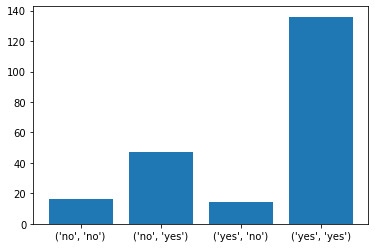

In [8]:
plt.bar(range(len(region['count'])), region['count'])
plt.xticks(range(len(region['count'])), region.index)
plt.show()

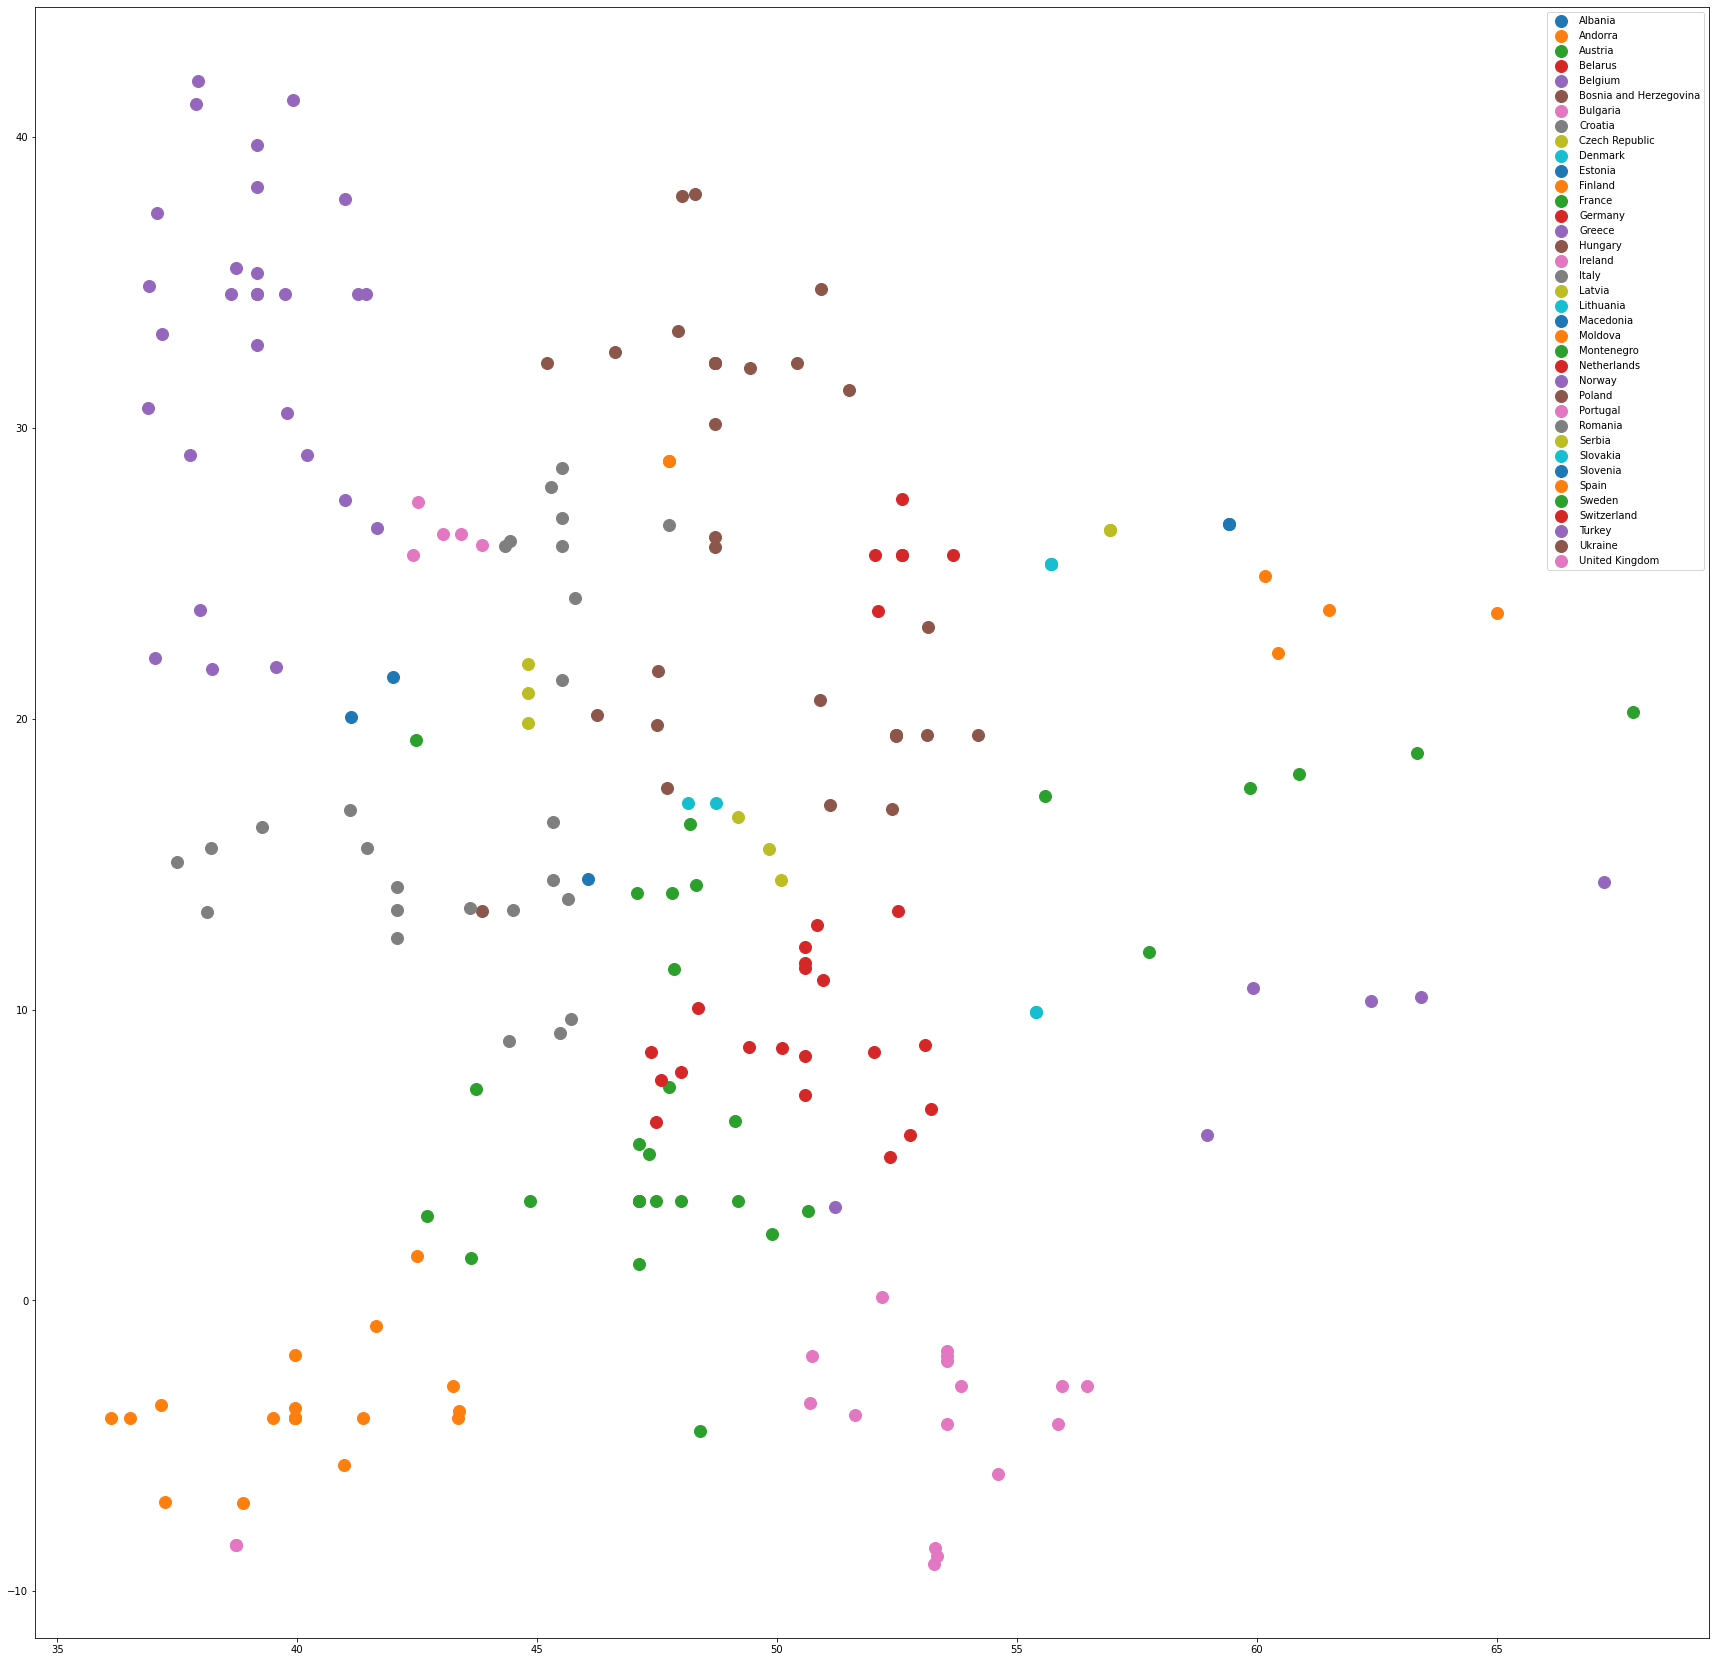

In [9]:
#Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.
county_types = EU_city.groupby('country')
fig, ax = plt.subplots(1,1)
fig.set_size_inches(30,30)
for country, group in county_types:
    plt.plot(group.get('latitude'), group.get('longitude'), marker='o', linestyle='', markersize=12, label=country)
plt.legend(loc='best')

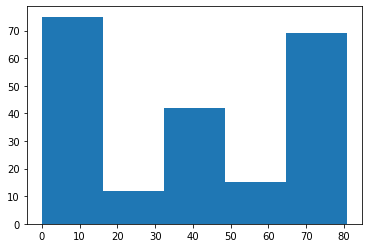

In [10]:
#The population column contains values unique to each country. So two cities of the same country will show the same population value.
#Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins.
plt.hist(EU_city['population'], bins=5)
plt.show()

Text(0.5, 1.0, 'EU:No,coastline:No')

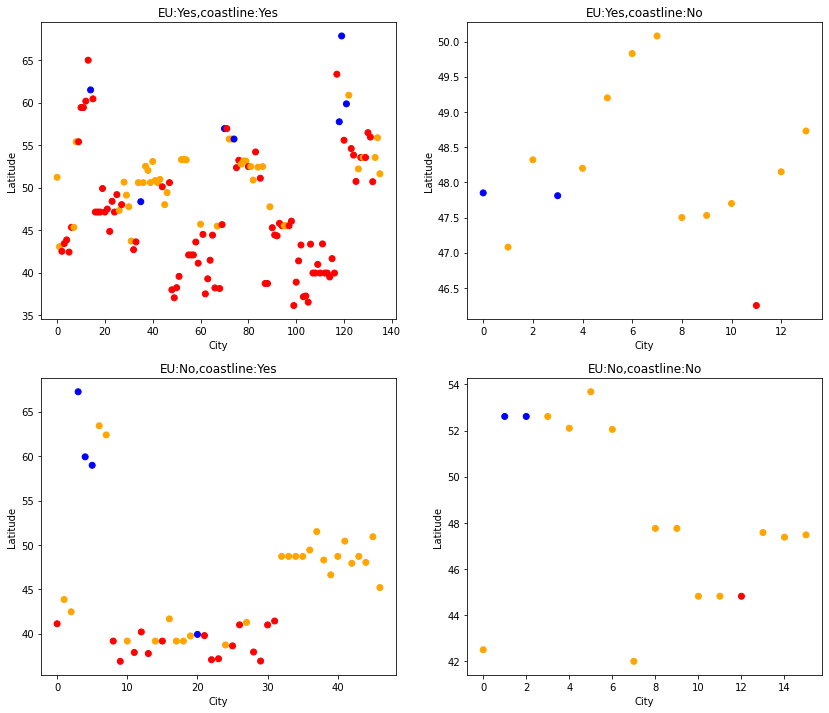

In [11]:
colors = []
for i in range(len(EU_city)):
    if EU_city.loc[i]['temperature'] > 10:
        colors.append('red')
    if EU_city.loc[i]['temperature'] < 6:
            colors.append('blue')
    if EU_city.loc[i]['temperature'] <= 10 and EU_city.loc[i]['temperature'] >= 6:
                colors.append('orange')
fig, ax = plt.subplots(2,2,figsize=(14,12))
for i in range(2):
    for j in range(2):
        ax[i][j].set_xlabel('City')
        ax[i][j].set_ylabel('Latitude')

yy = EU_city[(EU_city['EU'] == 'yes') & (EU_city['coastline'] == 'yes')]
city = [i for i in range(yy['city'].count())]
color1 = []
for j in yy.index:
    color1.append(colors[j])
ax[0][0].scatter(city, yy['latitude'], color = color1)
ax[0][0].set_title('EU:Yes,coastline:Yes')

yn = EU_city[(EU_city['EU'] == 'yes') & (EU_city['coastline'] == 'no')]
city1 = [i for i in range(yn['city'].count())]
color2 = []
for k in yn.index:
    color2.append(colors[k])
ax[0][1].scatter(city1, yn['latitude'], color = color2)
ax[0][1].set_title('EU:Yes,coastline:No')

ny = EU_city[(EU_city['EU'] == 'no') & (EU_city['coastline'] == 'yes')]
city2 = [i for i in range(ny['city'].count())]
color3 = []
for l in ny.index:
    color3.append(colors[l])
ax[1][0].scatter(city2, ny['latitude'], color = color3)
ax[1][0].set_title('EU:No,coastline:Yes')

nn = EU_city[(EU_city['EU'] == 'no') & (EU_city['coastline'] == 'no')]
city3 = [i for i in range(nn['city'].count())]
color4 = []
for p in nn.index:
    color4.append(colors[p])
ax[1][1].scatter(city3, nn['latitude'], color = color4)
ax[1][1].set_title('EU:No,coastline:No')